In [1]:
import re

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# https://github.com/trevismd/statannotations
from statannotations.Annotator import Annotator

sns.set_theme(style='white', font_scale=0.8)

plt.rcParams['text.usetex'] = True 
plt.rcParams['text.latex.preamble'] = r'\usepackage{sansmath} \sansmath'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'

plt.rc('font',   size=14)
plt.rc('axes',   titlesize=14) 
plt.rc('axes',   labelsize=14)
plt.rc('xtick',  labelsize=14)
plt.rc('ytick',  labelsize=14)
plt.rc('legend', fontsize=14)  
plt.rc('figure', titlesize=14)

pallete = sns.color_palette("colorblind", 9)

# Comment or uncomment the files below so they are excluded/included in the plots
results_files = [
    '../results/results_levenberg_marquardt_ordinary_least_squares_adj.csv',
    '../results/results_ordinary_least_squares_adj.csv',
    '../results/results_ordinary_least_squares_levenberg_marquardt_adj.csv',
    '../results/results_levenberg_marquardt_adj.csv',
    #'../results/results_ordinary_least_squares_adj_unrestricted.csv',
    #'../results/results_nothing.csv',
]

def solve_method_name_from_filename(text):
    """function that takes the filename (which contains information
    about the optimization heuristic used) and returns a pretty
    string with the name of the adj method
    """
    
    rep = {"../results/results_": "", "_adj": "", ".csv": "",
           "ordinary_least_squares": "OLS",
           "levenberg_marquardt" : "LM",
           "_unrestricted" : " (U)",
           "nothing" : "No adjustment"}

    rep = dict((re.escape(k), v) for k, v in rep.items()) 
    
    pattern = re.compile("|".join(rep.keys()))
    
    return pattern.sub(lambda m: rep[re.escape(m.group(0))], text).replace("_", "+")

## Loading the results and storing into an unique DF named `df_results`

(and also printing the smallest expression for the Airfoil data set)

In [5]:
df_results = []
for rf in results_files:
    adj_name = solve_method_name_from_filename(rf)
    
    df = pd.read_csv(rf)
    df['Adj_method'] = solve_method_name_from_filename(adj_name)

    df_results.append(df)
    
    print(f'- {adj_name} smallest expression: '+
          df.iloc[(df[df['Dataset']=='airfoil'])['N_nodes'].idxmin()]['Expr'] + '\n')
    
df_results = pd.concat(df_results, axis=0)

- LM+OLS smallest expression: -3.389*identity( 52.816+-1415.577*(x_1^-3.0 * x_3^-3.0) ) + 4.006*identity( 105.469+-4.262*(x_1^-2.0 * x_3^-3.0) ) + 7.57*identity( 74.886+0.885*(x_1^-2.0 * x_5^-2.0) ) + -9.263*identity( 103.516+-0.032*(x_1^-1.0 * x_3^-3.0) ) + 22.599*identity( 92.885+-0.723*(x_1^-1.0 * x_3^-2.0) ) + -6.372*identity( 70.571+4.567*(x_1^-1.0 * x_5^-1.0) ) + 1.38*identity( 27.238+102.513*(x_3^-1.0 * x_4^-2.0) ) + 0.003*identity( 780.395+-0.063*(x_3^-1.0 * x_5^-1.0) ) + 1.235*identity( 14.943+-6487.495*(x_4^-1.0 * x_5^1.0) ) + 0.079*identity( 82.553+0.146*(x_5^-1.0) ) + 0.0*identity( -5521.242+0.057*(x_4^3.0) ) + 0.67*identity( 26.26+-1.162*(x_1^1.0 * x_4^-2.0) ) + -2.916*log( 1.0+1.0*(x_1^2.0 * x_5^1.0) ) + -1.556*log( 1.0+1.0*(x_1^2.0 * x_3^3.0) ) + -1411.0

- OLS smallest expression: -283.832*sqrt( 0.0+1.0*(x_1^-3.0 * x_3^-3.0) ) + -0.432*cos( 0.0+1.0*(x_3^-3.0 * x_4^-1.0) ) + -207.487*identity( 0.0+1.0*(x_4^-1.0) ) + -2431.65*sqrt( 0.0+1.0*(x_4^-1.0 * x_5^3.0) ) + -21.429

In [6]:
display(df_results)

Dataset  Fold  Rep     Exec_time  RMSE_train  NMSE_train  MAE_train  \
0    airfoil     0    0    498.626804    2.513330    0.132617   1.904041   
1    airfoil     0    1    455.286950    2.524759    0.133826   1.902504   
2    airfoil     0    2   1509.258631    2.734267    0.156957   2.120352   
3    airfoil     0    3    813.118976    2.691648    0.152102   2.049132   
4    airfoil     0    4    724.825161    2.599366    0.141852   2.011111   
..       ...   ...  ...           ...         ...         ...        ...   
175    yacht     4    1    646.142753    5.903938    0.148890   4.287776   
176    yacht     4    2  12857.660887    5.465904    0.127616   3.173685   
177    yacht     4    3  11942.255269    5.747855    0.141122   3.764736   
178    yacht     4    4  24077.873369    5.699146    0.138740   3.511108   
179    yacht     4    5    752.781044    5.952002    0.151324   3.947807   

     RMSE_test  NMSE_test  MAE_test  N_nodes  \
0     2.731650   0.157144  1.891151      205   
1     2.786639   0.163535  1.924146      205   
2     2.860619   0.172333  2.136714      196   
3     2.942668   0.182361  2.052280      199   
4     2.819090   0.167366  1.989441      205   
..         ...        ...       ...      ...   
175   6.135564   0.170939  4.224033      161   
176   6.745711   0.206628  3.775820      173   
177   6.610672   0.198438  4.133890      164   
178   6.678228   0.202514  4.038216      170   
179   4.774873   0.103528  3.452321      179   

                                                  Expr Adj_method  
0    55.403*log( 199.26+12.807*(x_1^-2.0 * x_5^-2.0...     LM+OLS  
1    -13.208*log( 1.0+1.0*(x_1^-1.0 * x_3^-2.0) ) +...     LM+OLS  
2    4.529*identity( -71.598+17885.98*(x_1^-3.0 * x...     LM+OLS  
3    -0.064*identity( -485.967+-0.042*(x_1^-2.0 * x...     LM+OLS  
4    0.876*sin( 126.901+-3.783610252e6*(x_1^-3.0 * ...     LM+OLS  
..                                                 ...        ...  
175  1.0*cos( 0.0+1.0*(x_6^-2.0) ) + 1.0*cos( 0.0+1...         LM  
176  1.0*cos( 0.0+1.0*(x_2^-2.0 * x_4^2.0) ) + 1.0*...         LM  
177  1.0*cos( 0.0+1.0*(x_6^-2.0) ) + 1.0*cos( 0.0+1...         LM  
178  1.0*cos( 0.0+1.0*(x_6^-2.0) ) + 1.0*cos( 0.0+1...         LM  
179  1.0*cos( 0.0+1.0*(x_3^-2.0 * x_6^-3.0) ) + 1.0...         LM  

[720 rows x 13 columns]

## Reporting the results

## NMSE_test
\begin{tabular}{lllll}
\toprule
{} & LM & LM+OLS &OLS & OLS+LM \\
Dataset &&&&\\
\midrule
airfoil & $ 0.990 \pm0.034$& $ 0.146 \pm0.023$& $ 0.180 \pm0.054$& $ 0.315 \pm0.095$\\
concrete& $ 0.252 \pm0.032$& $ 0.147 \pm0.019$& $ 0.172 \pm0.016$& $ 0.215 \pm0.046$\\
energyCooling & $ 0.046 \pm0.015$& $ 0.028 \pm0.005$& $ 0.032 \pm0.008$& $ 0.070 \pm0.056$\\
energyHeating & $ 0.025 \pm0.033$& $ 0.003 \pm0.002$& $ 0.004 \pm0.003$& $ 0.051 \pm0.045$\\
wineRed & $ 0.716 \pm0.102$& $ 0.644 \pm0.043$& $ 0.651 \pm0.042$& $ 0.645 \pm0.048$\\
yacht & $ 0.169 \pm0.065$& $ 0.004 \pm0.001$& $ 0.005 \pm0.002$& $ 0.011 \pm0.016$\\
\bottomrule
\end{tabular}



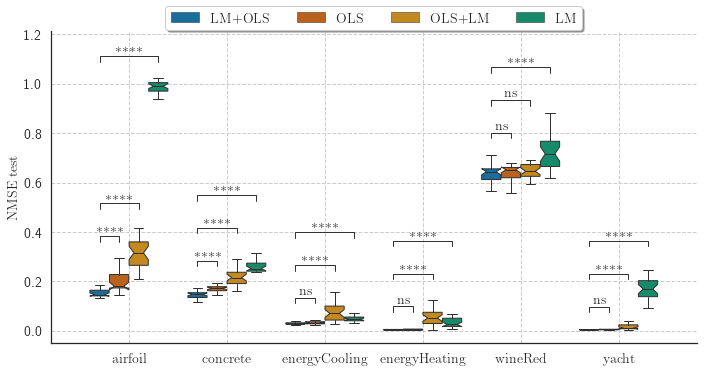

## N_nodes
\begin{tabular}{lllll}
\toprule
{} & LM & LM+OLS &OLS & OLS+LM \\
Dataset &&&&\\
\midrule
airfoil & $26.000 \pm 14.000$& $ 205.000 \pm8.250$& $ 143.500 \pm 41.250$& $70.000 \pm 28.500$\\
concrete& $ 173.000 \pm6.000$& $ 205.000 \pm3.000$& $ 152.500 \pm 23.250$& $70.000 \pm 21.000$\\
energyCooling & $ 173.000 \pm5.250$& $ 199.000 \pm 14.000$& $ 155.500 \pm 47.250$& $74.500 \pm 32.250$\\
energyHeating & $ 173.000 \pm6.000$& $ 196.000 \pm 19.250$& $ 151.000 \pm 53.250$& $71.500 \pm 23.250$\\
wineRed & $ 158.000 \pm 52.500$& $ 208.000 \pm5.250$& $ 152.500 \pm 15.000$& $65.500 \pm 24.000$\\
yacht & $ 167.000 \pm3.000$& $ 193.000 \pm 24.500$& $85.000 \pm 34.500$& $49.000 \pm 24.000$\\
\bottomrule
\end{tabular}



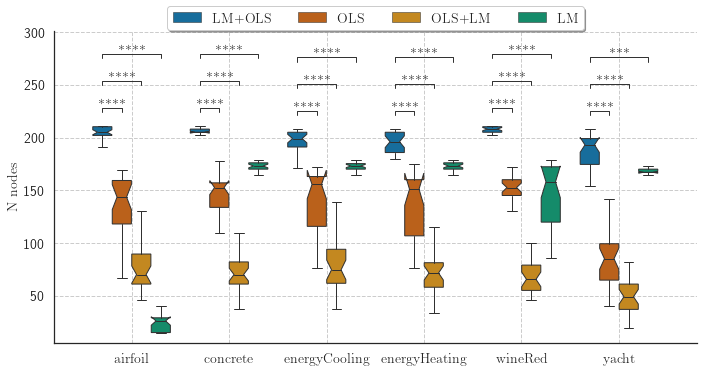

## Exec_time
\begin{tabular}{lllll}
\toprule
{} & LM & LM+OLS &OLS & OLS+LM \\
Dataset &&&&\\
\midrule
airfoil & $2065.541 \pm 1750.114$& $ 629.933 \pm281.639$& $ 147.131 \pm 57.247$& $ 388.740 \pm186.536$\\
concrete& $ 350.799 \pm101.586$& $ 427.156 \pm138.678$& $ 106.513 \pm 32.994$& $ 257.497 \pm136.102$\\
energyCooling & $1133.070 \pm 2422.665$& $ 657.114 \pm113.969$& $ 106.391 \pm 39.582$& $ 717.612 \pm 1892.302$\\
energyHeating & $ 712.098 \pm959.248$& $ 576.229 \pm242.460$& $93.486 \pm 34.518$& $ 733.522 \pm769.131$\\
wineRed & $5237.857 \pm 8802.802$& $1000.460 \pm676.963$& $ 272.837 \pm 50.573$& $1156.904 \pm685.456$\\
yacht & $ 819.542 \pm 2475.577$& $ 137.504 \pm 57.204$& $24.931 \pm 14.907$& $ 573.538 \pm769.286$\\
\bottomrule
\end{tabular}



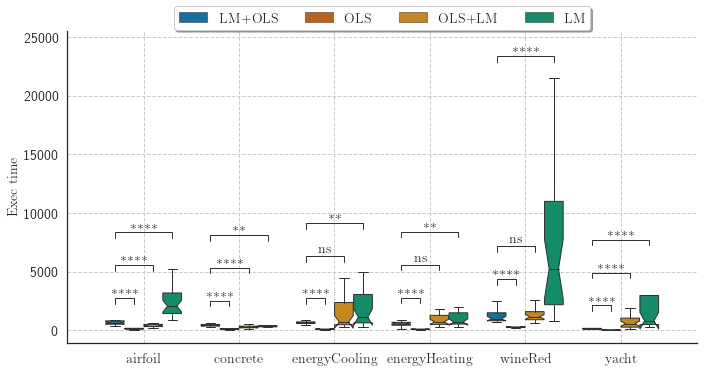

In [14]:
for info in ['NMSE_test', 'N_nodes', 'Exec_time']: #'MAE_test', 'NMSE_train'
    
    print(f"## {info}")
    df_results_pivoted = pd.pivot_table(
        df_results, values=info, index=['Dataset', 'Fold', 'Rep'], columns=['Adj_method'])
    
    # Calculating the median and the IQR to create the tables
    medians = df_results_pivoted.groupby('Dataset').quantile(0.5)
    q1 = df_results_pivoted.groupby('Dataset').quantile(0.25)
    q3 = df_results_pivoted.groupby('Dataset').quantile(0.75)
    iqr = q3.subtract(q1)
    
    # Dataframe to hold formatted values (median +- IQR)
    merged = pd.DataFrame()

    float_format = lambda x: '%10.3f' % x

    for col_name in medians.columns:
        merged.loc[:, col_name] = ' $' + medians[col_name].apply(float_format) + \
                                  r' \pm ' + iqr[col_name].apply(float_format) + '$ '
    
    #display(merged)    
    print(merged.to_latex(escape=False).replace('  ', ''))

    # Ordering the methods based on the median value for NMSE on test
    meds = df_results.groupby(['Adj_method', 'Dataset'])['NMSE_test'].median()
    meds = meds.unstack(level=1).rank().mean(axis=1).sort_values(ascending=True)
    
    # Getting the order and indexes of the methods
    methods = meds.index.values 
    indexes = range(len(methods))
    
    # Creating the pairs for statistical comparison: the best versus the others
    pairs = list(
        [((d, methods[0]), (d, methods[i]))for i in range(1, len(methods))
        for d in df_results['Dataset'].unique()]
    )
    
    plot_params = {
        'data'     : df_results,
        'x'        : 'Dataset',
        'y'        : info,
        "hue"      : "Adj_method",
        "hue_order": meds.index.values,
        "palette"  : {'OLS': pallete[3], 'OLS (U)': pallete[4], 'LM+OLS': pallete[0],
                      'OLS+LM': pallete[1], 'LM': pallete[2], 'No adjustment':pallete[5]}
    }
    
    # Generating the boxplot
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
    g = sns.boxplot(**plot_params, 
        showfliers=False, ax=ax, orient='v', notch=True, linewidth=1)

    # Add statistical annotations
    annotator = Annotator(ax, pairs, **plot_params)
    annotator.configure(
        test="Mann-Whitney", verbose=False, text_format='star', line_width=1,
        comparisons_correction='Holm-Bonferroni', line_offset=0.5,
        correction_format='replace')
    
    _, results = annotator.apply_and_annotate()

    # Improving the axis' styles
    for spine in ['right', 'top']:
        ax.spines[spine].set_visible(False)

    ax.set_axisbelow(True)
    ax.grid(linestyle='dashed') 

    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
              fancybox=True, shadow=True, ncol=5)

    ax.set_xlabel('')
    ax.set_ylabel(info.replace('_', ' '))

    ax.get_legend().set_title("") 

    plt.tight_layout()
    plt.savefig(f'./plots/boxplot_{info}.pdf', bbox_inches='tight')
    plt.show()

## Comparing two columns

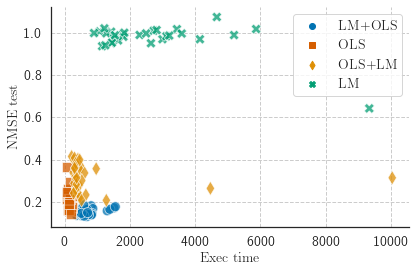

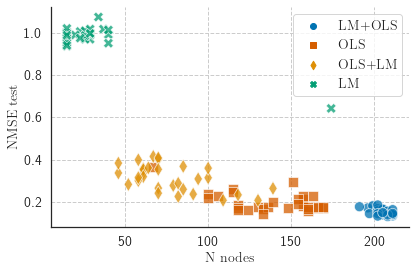

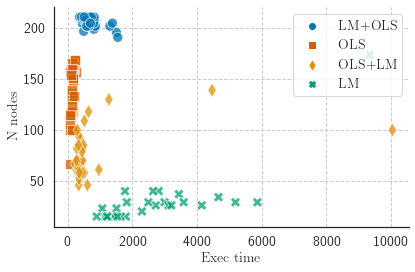

In [16]:
# We can create tuples with two informations (info1, info2)
# to generate a scatter plot comparing them
for info1, info2 in [
    ('Exec_time', 'NMSE_test'), ('N_nodes', 'NMSE_test'), ('Exec_time', 'N_nodes')]:
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    
    sns.scatterplot(**{
        'data'      : df_results[df_results['Dataset']=='airfoil'],
        'x'         : info1,
        'y'         : info2,
        "hue"       : "Adj_method",
        "hue_order" : meds.index.values,
        "palette"   : {'OLS': pallete[3], 'OLS (U)': pallete[4], 'LM+OLS': pallete[0],
                       'OLS+LM': pallete[1], 'LM': pallete[2], 'No adjustment':pallete[5]}
    }, ax=ax, style="Adj_method", alpha=0.75, s=100,
    markers=(['o', 's', 'd', 'X', 'P', 'D'])[:len(results_files)])

    # Improving the axis' styles
    for spine in ['right', 'top']:
        ax.spines[spine].set_visible(False)

    ax.set_axisbelow(True)
    ax.grid(linestyle='dashed')

    ax.set_xlabel(info1.replace('_', ' '))
    ax.set_ylabel(info2.replace('_', ' '))

    ax.get_legend().set_title("")
    ax.legend(loc='upper right')
    
    plt.tight_layout()
    plt.savefig(f'./plots/scatter_{info1, info2}.pdf', bbox_inches='tight')
    plt.show()